In [2]:
import numpy as np
import scipy as sp 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import os

In [3]:

data_path = "./Reviews.csv"

pd_data = pd.read_csv(data_path, encoding = "ISO-8859-1")

pd_data = pd_data[:10000]

1. Top-10 Reviewer

In [4]:
pd_data_reviews=pd_data.groupby(["UserId","ProfileName"]).count()

In [5]:
df1=pd_data_reviews.sort_values(by='Score',ascending=False).head(10)
df1.drop(columns=['Id','ProductId','HelpfulnessNumerator','HelpfulnessDenominator','Time','Summary','Text'])

,,Score
UserId,ProfileName,
A1Z54EM24Y40LL,c2,17
A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10
A35R32TA60XD57,M. Torma,9
A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8
A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7
A3NHUQ33CFH3VM,Citizen John,7
A3PJZ8TU8FDQ1K,Jared Castle,7
AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6
A26NFIQ7KWI8Y7,kt rose,6


In [54]:
one=pd_data[pd_data.ProfileName == 'c2'].Score.mean()
two=pd_data[pd_data.ProfileName == 'Carrie, "Formerly &#34;Sister Carrie&#34;"'].Score.mean()
three=pd_data[pd_data.ProfileName == 'M. Torma'].Score.mean()
four=pd_data[pd_data.ProfileName == 'Rebecca of Amazon "The Rebecca Review"'].Score.mean()
five=pd_data[pd_data.ProfileName == 'C. F. Hill "CFH"'].Score.mean()
six=pd_data[pd_data.ProfileName == 'Citizen John'].Score.mean()
seven=pd_data[pd_data.ProfileName == 'Jared Castle'].Score.mean()
eight=pd_data[pd_data.ProfileName == 'K. Padgett "familyof5"'].Score.mean()
nine=pd_data[pd_data.ProfileName == 'kt rose'].Score.mean()
ten=pd_data[pd_data.ProfileName == 'William Jens Jensen'].Score.mean()
score_mean=np.array([one,two,three,four,five,six,seven,eight,nine,ten])
score_mean

array([3.88235294, 3.8       , 4.11111111, 5.        , 4.42857143,
       3.14285714, 4.71428571, 2.66666667, 2.66666667, 3.        ])

In [76]:
df1.insert(3,column=['Score mean'],value=['3.882352', '3.800000', '4.111111', '5.000000', '4.428571',
       '3.142857', '4.714285', '2.666666', '2.666666', '3.000000'])

TypeError: unhashable type: 'list'

2.Plot score distribution for the user with the most number of reviews

In [7]:
c2=pd_data[pd_data.ProfileName == 'c2']
c2
a=0
b=0
c=0
d=0
e=0
for x in c2.Score:
    if x==1:
        a=a+1
    elif x==2:
        b=b+1
    elif x==3:
        c=c+1
    elif x==4:
        d=d+1
    else:
        e=e+1

In [34]:
plt.style.use('seaborn-notebook')

<BarContainer object of 5 artists>

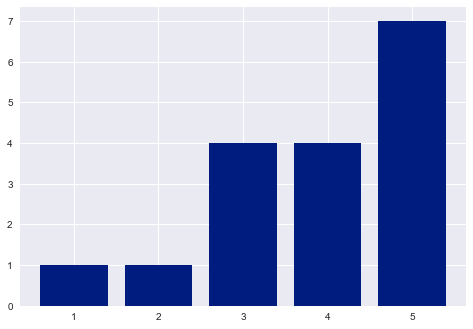

In [43]:
#color={ 1:'b', 2:'o',3:'g',4:'r',5:'p',}
m=np.array([a,b,c,d,e])
n=np.array([1,2,3,4,5])
plt.bar(n,m)

3.Plot pandas Series DataFrame (Time->Date)

In [47]:
import time
timeArray = time.localtime(pd_data.Time)

TypeError: cannot convert the series to <class 'int'>

4.Plot HeatMap using seaborn

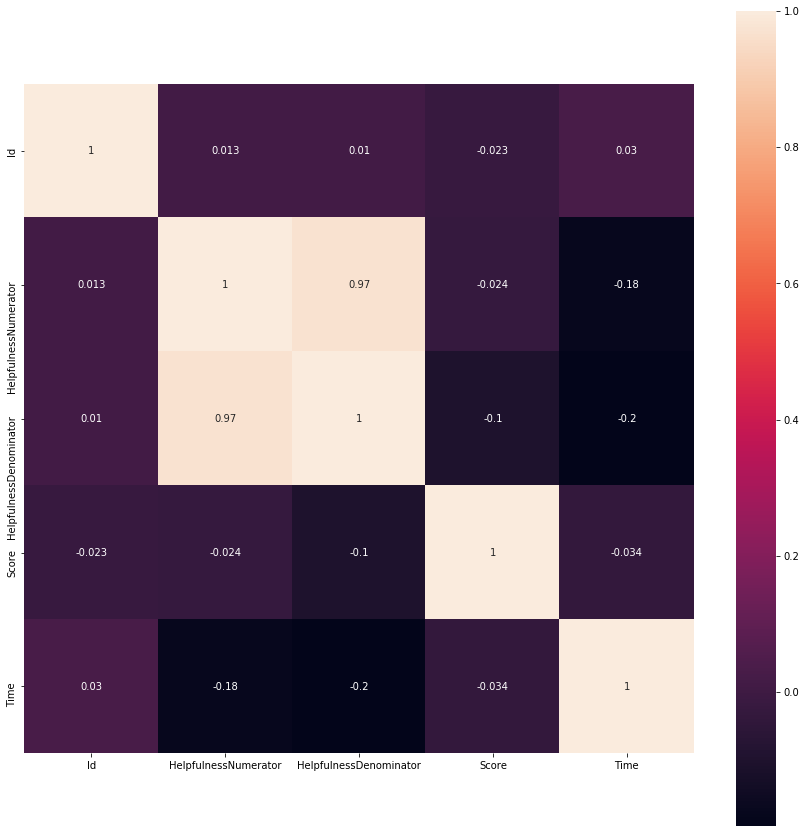

In [10]:
internal_chars = ['Id', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time']
corrmat = pd_data[internal_chars].corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, square=True, annot=True)
plt.show()

5. Helpful percent

In [11]:
pd_data.insert(10,column='ratio',value='0')
pd_data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ratio
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,0
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,0
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,0
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,0
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,0


In [24]:
Nu=pd_data.HelpfulnessNumerator
De=pd_data.HelpfulnessDenominator
pd_data.loc[pd_data.HelpfulnessNumerator<=pd_data.HelpfulnessDenominator,'ratio']=Nu/De
pd_data.loc[pd_data.HelpfulnessDenominator==0,'ratio']=-1
pd_data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ratio
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.000000
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.000000
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.000000
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.000000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.000000
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,-1.000000
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,-1.000000
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,-1.000000
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1.000000
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,-1.000000


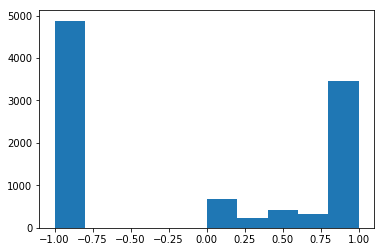

In [27]:
plt.hist(pd_data.ratio)
plt.show()